<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_6913/NGC_6913_version_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [1]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestClassifier

In [2]:
!pip install astroquery

     |████████████████████████████████| 6.5MB 7.1MB/s 
     |████████████████████████████████| 51kB 3.8MB/s 
     |████████████████████████████████| 2.6MB 58.4MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831873 sha256=35d0ea2b08f1c7d04fd9a89bf5993ad105abca15cb0842390cffac614be631e8
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery


In [3]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [27]:
## making a GAIA cone_search of 30m radius around NGC6913 center

coordinate = coord.SkyCoord.from_name('NGC6913')
print(coordinate)
radius = u.Quantity(0.8, u.deg)
# GAIA EDR3 data
# j = Gaia.cone_search_async(coordinate, radius, table_name="gaiaedr3.gaia_source")

Gaia.ROW_LIMIT = -1

# GAIA DR2 Data
j = Gaia.cone_search_async(coordinate, radius, table_name="gaiadr2.gaia_source")
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (305.98333333, 38.52333333)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [28]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,Gaia DR2 2061130135063018368,2061130135063018368,659634151,2015.5,305.979910,0.332861,38.522535,0.301018,0.373794,0.412532,0.906096,-5.100601,0.812966,-8.181460,0.579568,-0.017581,0.084075,0.098068,0.034593,0.372245,0.010567,-0.133693,-0.021647,0.017277,0.016911,242,0,241,1,2.371331,290.591705,0.973766,1.042753e+00,31,False,0.092856,1.314335,0.090345,-0.025863,...,374.200125,6.729877,55.602821,18.329161,1.700114,0,2.624422,1.276796,1.347626,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.913312,0.606578,324.067662,55.412832,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002802
1,1635721458409799680,Gaia DR2 2061130169422135168,2061130169422135168,1047410342,2015.5,305.986649,0.551148,38.524911,0.562689,-0.757284,0.713565,-1.061268,-4.351111,1.294378,-4.469651,1.147469,-0.314511,-0.306406,-0.143730,0.110184,0.285002,0.082362,-0.386891,0.024789,0.077053,-0.019642,214,0,213,1,2.072794,252.446564,0.397076,6.260261e-02,31,False,0.039263,1.379358,0.144610,0.042972,...,195.589708,10.444030,18.727419,19.033554,1.842011,0,2.083460,0.738298,1.345161,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.918285,0.603627,324.077848,55.412826,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.003028
2,1635721458409799680,Gaia DR2 2061130173719911552,2061130173719911552,1630697475,2015.5,305.987777,1.436923,38.525853,1.461241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.015759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88,0,88,0,-1.281829,66.976456,0.000000,0.000000e+00,3,False,0.013401,NaN,NaN,0.052217,...,110.490162,15.678766,7.047121,19.653610,2.215422,0,1.295437,-0.038664,1.334101,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.919563,0.603446,324.079948,55.413321,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.004285
3,1635721458409799680,Gaia DR2 2061130135061358080,2061130135061358080,1539788148,2015.5,305.977852,0.159351,38.523700,0.167229,0.232010,0.214437,1.081950,-3.257656,0.385975,-5.809052,0.344036,-0.101113,-0.028410,-0.068365,0.028975,0.305656,0.019233,-0.077661,-0.029386,0.035019,0.039842,263,0,262,1,1.800683,299.285553,0.564693,1.225498e+00,31,False,0.305587,1.323049,0.046636,0.036019,...,712.860518,10.730518,66.433006,17.629408,1.514112,0,2.449070,1.252272,1.196798,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.913341,0.608565,324.065922,55.414556,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.004309
4,1635721458409799680,Gaia DR2 2061130169422134016,2061130169422134016,1167108254,2015.5,305.98894

##### Applying Filter:

In [29]:
all_stars['pmra_over_error'] = abs(all_stars['pmra']/all_stars['pmra_error'])
all_stars['pmdec_over_error'] = abs(all_stars['pmdec']/all_stars['pmdec_error'])

In [30]:
all_stars_filtered = all_stars[all_stars['parallax_over_error'] > 3]

In [31]:
all_stars_filtered = all_stars_filtered[(all_stars_filtered.pmra_error < 0.3) & (all_stars_filtered.pmdec_error < 0.3)]

In [32]:
all_stars_filtered.shape

(23987, 99)

##### Visualizing GAIA data

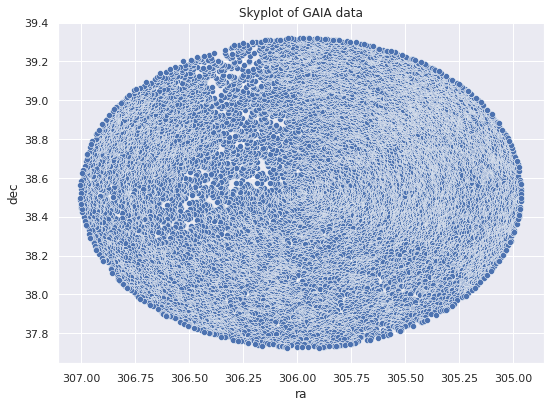

In [33]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x='ra', y='dec', 
                          data = all_stars_filtered)
skyplot.invert_xaxis()
plt.title('Skyplot of GAIA data')
plt.show()

#### Finding Cantat Data

In [34]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [35]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
#catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
#catalogs

In [36]:
## saving only NGC 6913 data from Cantat GAIA DR2 paper

cantat_6913 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_6913")
cantat_6913 = cantat_6913[0].to_pandas()
cantat_6913

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,305.969238,38.303085,2061114643120061952,0.5934,-3.488,-5.897,NaN,15.447200,1.6735,0.8,NGC_6913,305.969258,38.303110
1,305.871156,38.486870,2061130551679058432,0.5344,-3.476,-5.747,NaN,14.504200,1.0105,0.8,NGC_6913,305.871175,38.486895
2,305.916894,38.295450,2061115021077207296,0.5359,-3.500,-5.608,NaN,15.938500,1.7948,0.4,NGC_6913,305.916914,38.295474
3,305.943575,38.655508,2061158176909306496,0.5496,-3.072,-5.630,NaN,13.786300,1.3860,0.7,NGC_6913,305.943591,38.655532
4,305.729983,38.379210,2061125363358595200,0.5688,-3.459,-5.879,NaN,14.523400,1.3140,1.0,NGC_6913,305.730002,38.379235
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,305.693412,38.581854,2061180579450262656,0.5195,-3.086,-6.098,NaN,16.030199,1.6694,0.1,NGC_6913,305.693429,38.581881
166,305.710603,38.650615,2061181571589836544,0.5638,-3.211,-5.658,NaN,17.743799,1.9652,0.5,NGC_6913,305.710621,38.650640
167,305.830998,38.732448,2061206413680783488,0.4924,-3.305,-5.605,NaN,17.912500,2.3891,0.2,NGC_6913,305.831016,38.732472
168,306.214730,38.283003,2058109815277535616,0.5582,-3.076,-5.901,NaN,16.621000,2.3549,0.1,NGC_6913,306.214747,38.283028


In [37]:
# renaming the cantat table to match it with gaia_data
cantat_6913 = cantat_6913.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [38]:
# taking the subset of only source_id and PMemb
cantat_6913 = cantat_6913.loc[:,['source_id', 'PMemb']]


In [39]:
# join the two table on source_id
cantat_6913 = all_stars_filtered.join(cantat_6913.set_index('source_id'), on='source_id')

In [40]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_6913 = cantat_6913.dropna(subset=['PMemb'])
cantat_6913

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb
29,1635721458409799680,Gaia DR2 2061130139362333824,2061130139362333824,954418691,2015.5,305.990473,0.013010,38.514351,0.014309,0.542993,0.017657,30.752131,-3.402550,0.029173,-5.793631,0.029298,-0.121473,0.013768,-0.120340,-0.001874,0.249431,-0.026708,-0.117860,-0.100446,-0.117522,-0.106875,275,0,275,0,-4.420243,179.250107,0.000000,0.000000,31,False,68.874550,1.517808,0.003702,0.051634,...,13.131310,1.262399,1,1.257004,0.546887,0.710116,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.911361,0.595112,324.074993,55.401971,100002,4813.937012,4715.242676,4982.020020,NaN,NaN,NaN,NaN,NaN,NaN,200111,4.187072,3.909311,4.364184,8.482368,7.701898,9.262839,https://gea.esac.esa.int/data-server/datalink/...,,0.010579,116.632893,197.746675,0.9
39,1635721458409799680,Gaia DR2 2061130173722072320,2061130173722072320,1141266204,2015.5,305.998644,0.033662,38.527390,0.022625,0.507027,0.034273,14.793980,-3.190718,0.081669,-5.637011,0.045854,-0.146535,-0.394684,0.417441,0.130678,0.264738,-0.031606,-0.128072,-0.211356,-0.191511,0.091486,197,0,196,1,-1.613617,160.571564,0.000000,0.000000,31,False,21.751890,1.494739,0.007018,0.083249,...,14.249866,1.320299,0,1.387800,0.584863,0.802938,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.925706,0.597371,324.094710,55.411221,100001,4492.000000,4425.500000,4906.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111,3.112038,2.608971,3.206267,3.552577,2.987486,4.117669,https://gea.esac.esa.int/data-server/datalink/...,,0.012639,39.068763,122.933351,0.7
59,1635721458409799680,Gaia DR2 2061130070642666880,2061130070642666880,1477295721,2015.5,305.989576,0.021783,38.509626,0.021940,0.537889,0.028150,19.107899,-3.441772,0.044039,-5.877576,0.043456,-0.133816,0.108276,-0.140303,-0.061589,0.237611,-0.103821,-0.083638,-0.247389,-0.068452,-0.057484,248,248,247,1,0.012927,241.617935,0.000000,0.000000,31,True,240.833008,1.551702,0.006401,0.109116,...,11.969657,1.245247,0,1.129319,0.480597,0.648722,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.907090,0.592971,324.070442,55.397954,100001,4938.652344,4866.310059,5085.106934,NaN,NaN,NaN,NaN,NaN,NaN,200111,6.942542,6.548400,7.150491,25.832445,23.617132,28.047758,https://gea.esac.esa.int/data-server/datalink/...,,0.014555,78.151991,135.253726,1.0
81,1635721458409799680,Gaia DR2 2061130100701594752,2061130100701594752,1037082205,2015.5,305.998585,0.070253,38.510091,0.079943,0.526576,0.095286,5.526245,-3.564348,0.164491,-5.650762,0.176258,-0.126325,0.011177,-0.093192,0.009505,0.082709,-0.016679,-0.284162,-0.148596,0.030191,-0.072290,247,0,247,0,2.805028,308.320526,0.354874,2.568195,31,False,1.535858,1.357920,0.020578,0.124196,...,16.305899,1.429119,0,2.239937,1.140545,1.099392,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.911521,0.587468,324.082092,55.395476,<NA>,NaN,NaN,NaN,NaN,NaN,N

In [41]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_6913.to_csv('NGC_6913_cantat.csv')
# all_stars.to_csv('NGC_6913_Gaia_30m.csv')

In [42]:
cantat_6913.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb
count,1.700000e+02,1.700000e+02,1.700000e+02,170.0,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.0,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,1.690000e+02,169.000000,169.000000,169.000000,169.000000,170.000000,169.000000,169.000000,169.000000,1.000000,1.000000,170.000000,1.0,1.0,1.0,170.000000,170.000000,170.000000,170.000000,145.000000,145.000000,145.000000,145.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,144.0,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,170.000000,170.000000,170.000000,170.000000
mean,1.635721e+18,2.061104e+18,8.991247e+08,2015.5,305.916874,0.030140,38.498505,0.036322,0.549987,0.041139,18.595560,-3.380745,0.067076,-5.764726,0.074174,-0.052862,0.047154,-0.138174,-0.051963,0.178949,-0.087508,-0.279096,-0.162469,-0.028793,-0.032876,261.029412,31.388235,259.623529,1.405882,-0.452034,251.052277,0.048083,0.398448,31.0,57.397316,1.461027,0.009230,0.062775,29.729412,16.105882,...,7.444622e+04,113.394450,690.067383,14.236567,1.320751,0.176471,1.606532,0.757240,0.849291,-17.989237,5.377616,0.035294,5000.0,3.0,0.0,76.865400,0.633193,323.971153,55.411141,100001.193103,4521.335938,4340.726562,4858.288574,2.151746,1.871649,2.629261,1.076579,0.928603,1.343582,200111.0,4.154220,3.680255,4.482897,15.790257,14.470527,17.109993,0.155467,71.419562,110.971035,0.561765
std,0.000000e+00,3.270528e+14,4.883002e+08,0.0,0.142852,0.021423,0.125399,0.026414,0.031147,0.028844,8.643813,0.162431,0.048570,0.184031,0.055731,0.074475,0.128318,0.103372,0.062765,0.135922,0.061610,0.135682,0.085144,0.094080,0.076245,22.651574,86.893881,22.167718,2.222790,3.340387,79.192787,0.099826,1.263057,0.0,97.824677,0.079588,0.006703,0.040093,2.543762,0.979355,...,3.264491e+05,603.299153,393.197235,1.571638,0.072689,0.397521,0.452540,0.271826,0.183238,NaN,NaN,0.460179,NaN,NaN,NaN,0.113765,0.123647,0.190410,0.128638,0.396102,556.623779,550.933777,521.955872,0.770660,0.725869,0.540000,0.391130,0.365506,0.281625,0.0,3.504805,3.357561,3.662597,61.949299,57.375221,66.523674,0.085152,33.970233,51.393213,0.257680
min,1.635721e+18,2.058110e+18,1.723005e+06,2015.5,305.636921,0.011508,38.261299,0.013074,0.479977,0.015596,3.813220,-3.740193,0.025444,-6.255921,0.027417,-0.256366,-0.394684,-0.369383,-0.213974,-0.214332,-0.228630,-0.749702,-0.336544,-0.197922,-0.274328,197.000000,0.000000,196.000000,0.000000,-8.638947,106.939201,0.000000,0.000000,31.0

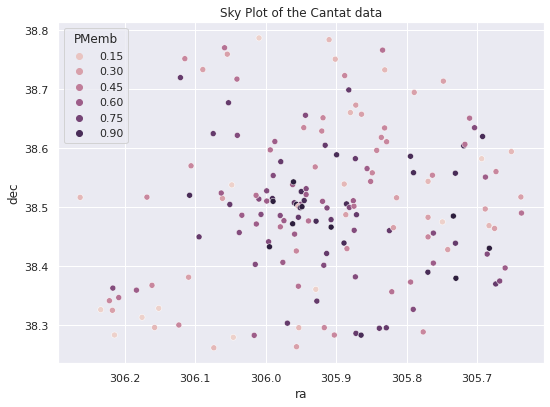

In [43]:
## plotting the skyplot 

skyplot = sns.scatterplot(x = cantat_6913['ra'], y = cantat_6913['dec'], 
                          hue = cantat_6913['PMemb'])
skyplot.invert_xaxis()
plt.title('Sky Plot of the Cantat data')
plt.show()

### Creating, Examining and Processing the Training Data


#### Training Data

In [44]:
# import member dataset
member = cantat_6913.copy()

In [45]:
### adding their distance from the center of the clusters

## NGC 6913
center = coord.SkyCoord.from_name('NGC6913')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((member['ra'] - center_ra)*np.cos(np.radians(member['dec'])))**2 + (member['dec'] - center_dec)**2 )
member['dist_6913_center'] = distance

In [46]:
# maximum distance of stars in Cantat Data
cantat_radius = max(member.dist_6913_center)

In [47]:
member['member'] = np.full(len(member), 1)
member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb,dist_6913_center,member
29,1635721458409799680,Gaia DR2 2061130139362333824,2061130139362333824,954418691,2015.5,305.990473,0.013010,38.514351,0.014309,0.542993,0.017657,30.752131,-3.402550,0.029173,-5.793631,0.029298,-0.121473,0.013768,-0.120340,-0.001874,0.249431,-0.026708,-0.117860,-0.100446,-0.117522,-0.106875,275,0,275,0,-4.420243,179.250107,0.000000,0.000000,31,False,68.874550,1.517808,0.003702,0.051634,...,1,1.257004,0.546887,0.710116,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.911361,0.595112,324.074993,55.401971,100002,4813.937012,4715.242676,4982.020020,NaN,NaN,NaN,NaN,NaN,NaN,200111,4.187072,3.909311,4.364184,8.482368,7.701898,9.262839,https://gea.esac.esa.int/data-server/datalink/...,,0.010579,116.632893,197.746675,0.9,0.010578,1
39,1635721458409799680,Gaia DR2 2061130173722072320,2061130173722072320,1141266204,2015.5,305.998644,0.033662,38.527390,0.022625,0.507027,0.034273,14.793980,-3.190718,0.081669,-5.637011,0.045854,-0.146535,-0.394684,0.417441,0.130678,0.264738,-0.031606,-0.128072,-0.211356,-0.191511,0.091486,197,0,196,1,-1.613617,160.571564,0.000000,0.000000,31,False,21.751890,1.494739,0.007018,0.083249,...,0,1.387800,0.584863,0.802938,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.925706,0.597371,324.094710,55.411221,100001,4492.000000,4425.500000,4906.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111,3.112038,2.608971,3.206267,3.552577,2.987486,4.117669,https://gea.esac.esa.int/data-server/datalink/...,,0.012639,39.068763,122.933351,0.7,0.012646,1
59,1635721458409799680,Gaia DR2 2061130070642666880,2061130070642666880,1477295721,2015.5,305.989576,0.021783,38.509626,0.021940,0.537889,0.028150,19.107899,-3.441772,0.044039,-5.877576,0.043456,-0.133816,0.108276,-0.140303,-0.061589,0.237611,-0.103821,-0.083638,-0.247389,-0.068452,-0.057484,248,248,247,1,0.012927,241.617935,0.000000,0.000000,31,True,240.833008,1.551702,0.006401,0.109116,...,0,1.129319,0.480597,0.648722,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.907090,0.592971,324.070442,55.397954,100001,4938.652344,4866.310059,5085.106934,NaN,NaN,NaN,NaN,NaN,NaN,200111,6.942542,6.548400,7.150491,25.832445,23.617132,28.047758,https://gea.esac.esa.int/data-server/datalink/...,,0.014555,78.151991,135.253726,1.0,0.014552,1
81,1635721458409799680,Gaia DR2 2061130100701594752,2061130100701594752,1037082205,2015.5,305.998585,0.070253,38.510091,0.079943,0.526576,0.095286,5.526245,-3.564348,0.164491,-5.650762,0.176258,-0.126325,0.011177,-0.093192,0.009505,0.082709,-0.016679,-0.284162,-0.148596,0.030191,-0.072290,247,0,247,0,2.805028,308.320526,0.354874,2.568195,31,False,1.535858,1.357920,0.020578,0.124196,...,0,2.239937,1.140545,1.099392,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.911521,0.587468,324.082092,55.395476,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.

In [48]:
### adding their distance from the center of the clusters

## NGC 6913
center = coord.SkyCoord.from_name('NGC6913')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((all_stars_filtered['ra'] - center_ra)*np.cos(np.radians(all_stars_filtered['dec'])))**2 + (all_stars_filtered['dec'] - center_dec)**2 )
all_stars_filtered['dist_6913_center'] = distance

In [49]:
non_member = all_stars_filtered[all_stars_filtered['dist_6913_center'] >= 0.7].sample(len(member), random_state = 42)

In [50]:
non_member['member'] = np.full(len(non_member), 0)
non_member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,dist_6913_center,member
116269,1635721458409799680,Gaia DR2 2058110399392696576,2058110399392696576,1182732248,2015.5,306.604899,0.051232,37.974829,0.068863,0.339763,0.077135,4.404794,-3.900727,0.114730,-5.429255,0.127758,0.053566,0.102476,-0.094986,-0.115804,0.324283,-0.180182,-0.208401,-0.207076,-0.064844,0.026515,275,0,274,1,7.634575,486.792023,0.435484,8.244487,31,False,2.297515,1.218037,0.016294,0.083778,...,1.624874,0,3.406348,2.031059,1.375289,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.749362,-0.110363,324.455735,54.711765,100001,4175.344727,3655.300049,4732.859863,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.734251,33.999156,42.496374,0.735477,0
111518,1635721458409799680,Gaia DR2 2061096634317894784,2061096634317894784,1121130182,2015.5,305.064663,0.046192,38.486206,0.062172,0.333548,0.064231,5.192986,-3.170742,0.095128,-4.996337,0.120012,0.061201,0.193635,-0.199390,-0.093924,0.037761,-0.143142,-0.364695,-0.186846,0.141588,0.052357,247,0,244,3,-0.132153,235.461655,0.000000,0.000000,31,False,3.264585,1.357098,0.015545,-0.003054,...,1.388175,0,2.049613,1.018484,1.031129,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.474879,1.174147,322.885947,55.672238,100001,3759.000000,3627.000000,4398.390137,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.719873,33.331311,41.631828,0.720055,0
112174,1635721458409799680,Gaia DR2 2061072449360567168,2061072449360567168,1194473100,2015.5,305.163762,0.048142,38.194304,0.058128,0.619719,0.066346,9.340652,1.782368,0.118025,-0.832898,0.126027,-0.084405,0.057515,-0.103420,0.021310,0.262524,-0.018067,-0.117518,-0.097306,0.117041,0.007685,248,0,248,0,0.312986,249.286697,0.000000,0.000000,31,False,3.060491,1.449471,0.014315,0.080769,...,1.356872,0,1.672819,0.755787,0.917032,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.278425,0.944653,322.803111,55.373826,100001,4166.564941,3990.500000,4376.844727,NaN,NaN,NaN,NaN,NaN,NaN,200111,1.290449,1.169432,1.406833,0.452157,0.349419,0.554895,https://gea.esac.esa.int/data-server/datalink/...,,0.721994,15.101577,6.608859,0.723288,0
115061,1635721458409799680,Gaia DR2 2064133386650371328,2064133386650371328,514765060,2015.5,306.916498,0.028554,38.553984,0.043628,0.568319,0.041745,13.614083,-0.280735,0.062623,-2.569368,0.088997,-0.053294,-0.133256,-0.063231,-0.094193,-0.020374,-0.108159,-0.565201,-0.169978,0.225583,-0.023793,246,0,245,1,0.666561,254.208481,0.000000,0.000000,31,False,8.661458,1.405739,0.009278,0.058746,...,1.345461,0,1.845211,0.893538,0.951673,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,77.362825,0.027250,325.260762,55.137529,100001,3900.000000,3884.000000,4204.720215,2.5687,2.1789,3.1257,1.3033,1.0435,1.6124,200111,2.812501,2.419623,

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


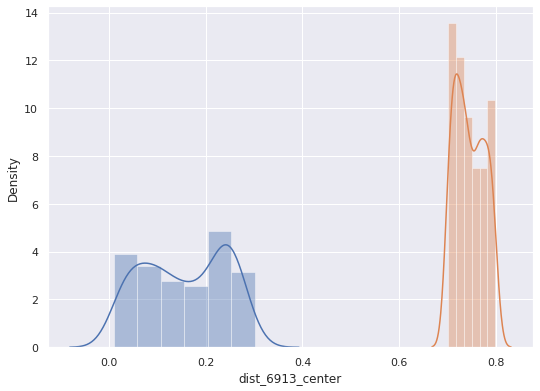

In [51]:
sns.distplot(member['dist_6913_center'])
sns.distplot(non_member['dist_6913_center'])
plt.show()

In [52]:
training_data = pd.concat([member, non_member])

In [53]:
# Examining the descriptive statistics of each column
training_data.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_6913_center,member
count,3.400000e+02,3.400000e+02,3.400000e+02,340.0,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.0,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,...,339.000000,339.000000,339.000000,340.000000,339.000000,339.000000,339.000000,8.000000,8.000000,340.000000,8.000000,8.000000,8.0,340.000000,340.000000,340.000000,340.000000,241.000000,241.000000,241.000000,241.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,215.0,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,340.000000,340.000000,340.000000,170.000000,340.000000,340.000000
mean,1.635721e+18,2.061370e+18,8.868849e+08,2015.5,305.898652,0.042792,38.543555,0.052757,0.728948,0.058677,18.511908,-2.326585,0.096576,-4.973024,0.105524,-0.044066,0.032671,-0.139656,-0.053763,0.184475,-0.092040,-0.286072,-0.154572,-0.026112,-0.029438,257.973529,20.008824,256.541176,1.432353,0.866787,280.861206,0.095760,0.995696,31.0,36.217941,1.430251,0.013145,0.054575,29.423529,16.091176,...,525.496216,14.917356,1.363785,0.126471,1.797208,0.868946,0.928262,-7.597980,5.213047,0.191176,4937.500000,3.375000,0.0,76.895105,0.671149,323.980802,55.457252,100001.161826,4411.927246,4231.877441,4754.446777,1.775261,1.529737,2.149103,0.887717,0.759134,1.089724,200111.0,3.841433,3.380998,4.146428,14.242146,12.977774,15.506526,0.450561,56.160312,89.257909,0.561765,0.450428,0.500000
std,0.000000e+00,1.872156e+15,4.647788e+08,0.0,0.521044,0.028520,0.352475,0.035586,0.815227,0.039014,24.274483,4.405042,0.065978,6.370531,0.071116,0.082096,0.126489,0.099748,0.066673,0.123910,0.069585,0.129068,0.086653,0.102899,0.085469,22.127997,70.511594,21.766285,1.959354,3.812623,108.109680,0.149727,2.555161,0.0,78.406731,0.085300,0.008849,0.047207,2.453708,0.925186,...,388.791473,1.675655,0.116312,0.341616,0.522647,0.325345,0.210170,14.392441,6.167575,1.319888,495.515594,0.694365,0.0,0.349557,0.409890,0.674522,0.379426,0.369057,672.382446,680.456055,633.087402,0.989572,0.958468,0.972086,0.497668,0.478046,0.499080,0.0,3.874743,3.635728,4.094769,62.079193,57.167645,66.996788,0.302337,46.307878,78.778723,0.257680,0.302191,0.500737
min,1.635721e+18,2.058001e+18,1.723005e+06,2015.5,304.967784,0.011439,37.748251,0.013074,0.234275,0.015596,3.014853,-24.626297,0.023579,-70.980742,0.027417,-0.305592,-0.394684,-0.395663,-0.236400,-0.214332,-0.263936,-0.749702,-0.388688,-0.305855,-0.345111,178.000000,0.000000,178.000000,0.000000,-8.638947,106.939201,0.000000,0

In [54]:
# Choosing the features

feature_columns = ['parallax',
                   'pmra', 'pmdec']

features = training_data.loc[:,feature_columns]
targets = training_data['member']

In [55]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,parallax,pmra,pmdec
count,340.000000,340.000000,340.000000
mean,0.728948,-2.326587,-4.973025
std,0.815227,4.405041,6.370530
min,0.234275,-24.626297,-70.980743
25%,0.513796,-3.504321,-5.900752
50%,0.554042,-3.297761,-5.673639
75%,0.608244,-2.060693,-4.514169
max,12.085427,36.041836,32.360016


In [56]:
targets.value_counts()

1    170
0    170
Name: member, dtype: int64

#### Visualizing Training Data


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


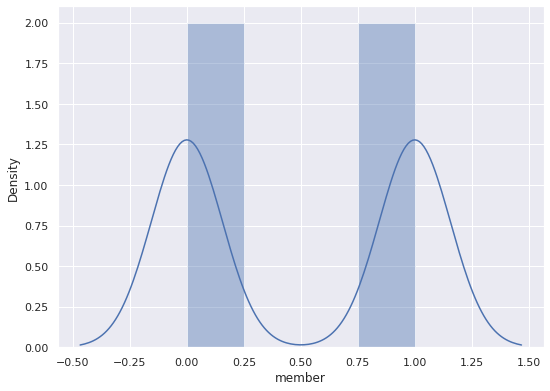

In [57]:
# histogram of PMemb in the training data
sns.distplot(training_set['member'])
plt.show()

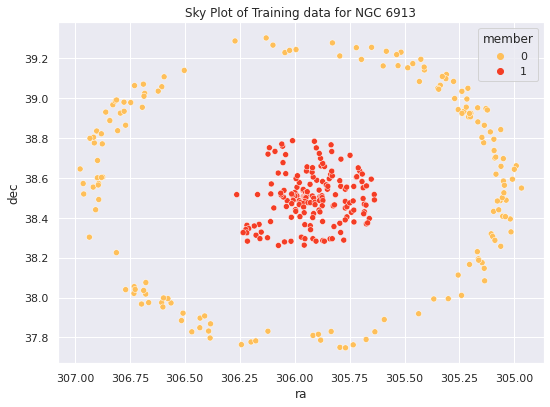

In [58]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', palette='YlOrRd', hue = 'member', data = training_data)
skyplot.invert_xaxis()
plt.title('Sky Plot of Training data for NGC 6913')
plt.show()

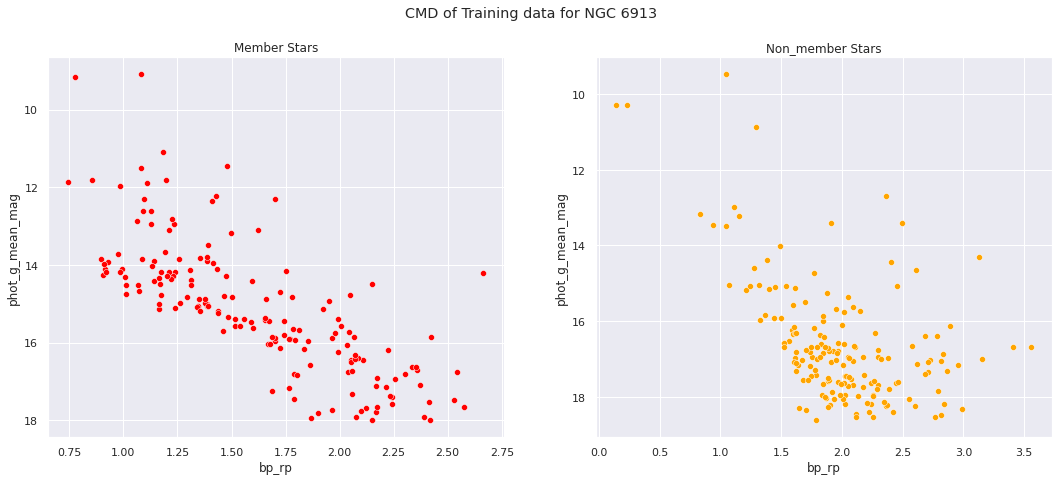

In [59]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
#cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', hue = 'PMemb', data = training_data)
#cmd.invert_yaxis()
#plt.title('')
#plt.show()

# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(18,7))
fig.suptitle('CMD of Training data for NGC 6913 ')

sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
axes[0].invert_yaxis()

#plt.show()
sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
axes[1].invert_yaxis()

plt.show()


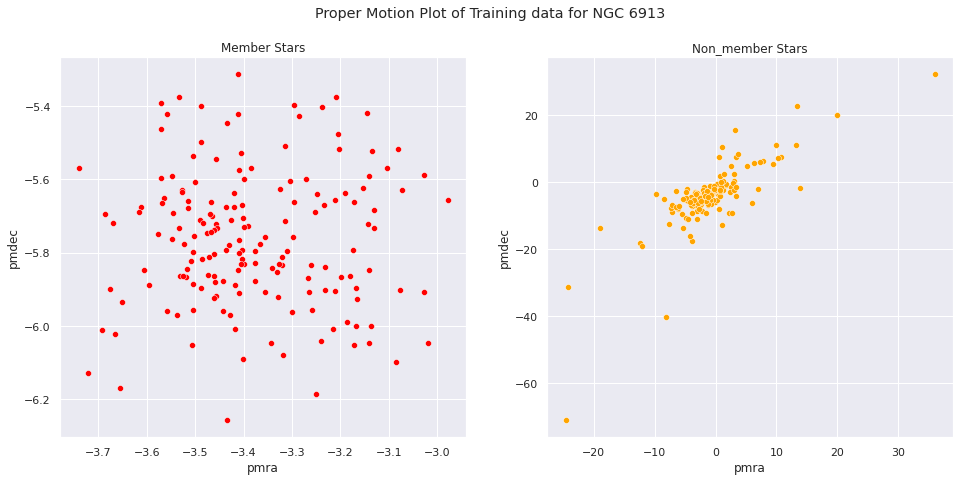

In [60]:
# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(16,7))
fig.suptitle('Proper Motion Plot of Training data for NGC 6913 ')

sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
#plt.show()
sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


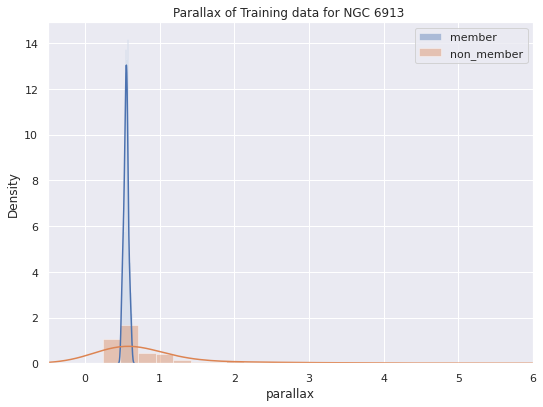

In [61]:
sns.distplot(member.parallax, label='member')
sns.distplot(non_member.parallax, label = 'non_member')
plt.xlim(-0.5,6)
plt.title('Parallax of Training data for NGC 6913 ')
plt.legend()
plt.show()

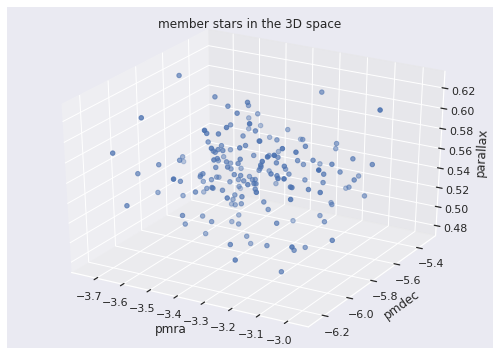

In [62]:
from mpl_toolkits.mplot3d import Axes3D


ax = plt.figure().gca(projection='3d')

ax.scatter(member.pmra, member.pmdec, member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('member stars in the 3D space')
plt.show()


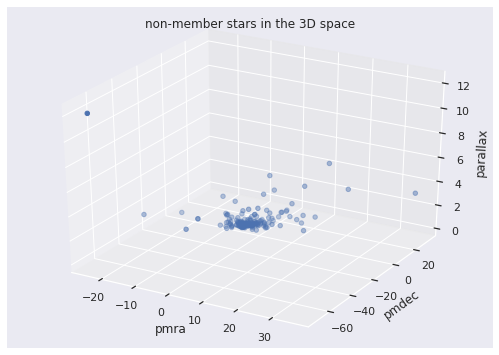

In [63]:
ax = plt.figure().gca(projection='3d')

ax.scatter(non_member.pmra, non_member.pmdec, non_member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('non-member stars in the 3D space')
plt.show()


#### Check Feature Importance using Random Forest

In [64]:
# Use Random Forest on whole dataset using 100 different trees 
rfc = RandomForestClassifier(n_estimators = 100, oob_score = True)
rfc.fit(features, targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfc.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

pmra        0.382209
pmdec       0.360355
parallax    0.257435
dtype: float64

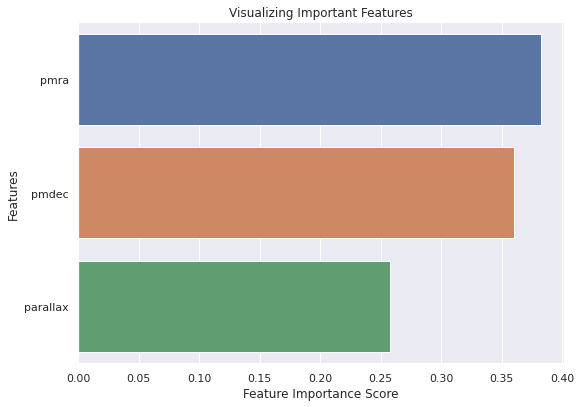

In [66]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Selection and Accuracy Estimate using Test Data

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report

In [68]:
from sklearn.model_selection import train_test_split
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
train_features, test_features, train_targets, test_targets = train_test_split(features, 
                                                                                targets, 
                                                                                test_size = 0.3, 
                                                                                random_state=258)

In [69]:
def evaluate_model(model):
    test_predict = model.predict(test_features)
    train_predict = model.predict(train_features)

    print('Model Accuracy:')
    print("Precision on training data: %.3f" % precision_score(train_targets, train_predict))
    print("Precision on testing data: %.3f" % precision_score(test_targets, test_predict))
    print('Accuracy on test data: %.3f' % accuracy_score(test_targets, test_predict))


    sns.heatmap(confusion_matrix(test_targets, test_predict), cmap= 'Greens', annot = True)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report: \n", classification_report(test_targets, test_predict))

#### SVC

In [70]:
from sklearn.svm import SVC

# SVC model
svc_clf = SVC(kernel='rbf', gamma = 'scale', random_state=42)

svc_clf.fit(train_features, train_targets)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

Model Accuracy:
Precision on training data: 0.687
Precision on testing data: 0.789
Accuracy on test data: 0.853


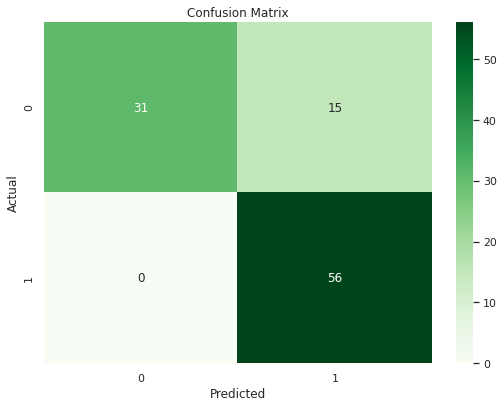

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.67      0.81        46
           1       0.79      1.00      0.88        56

    accuracy                           0.85       102
   macro avg       0.89      0.84      0.84       102
weighted avg       0.88      0.85      0.85       102



In [71]:
evaluate_model(svc_clf)

#### Naive Bayes

Model Accuracy:
Precision on training data: 0.942
Precision on testing data: 0.966
Accuracy on test data: 0.980


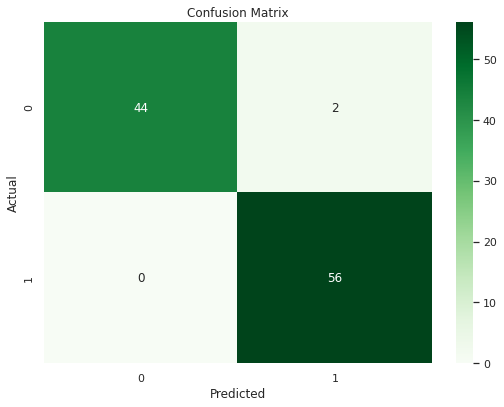

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        46
           1       0.97      1.00      0.98        56

    accuracy                           0.98       102
   macro avg       0.98      0.98      0.98       102
weighted avg       0.98      0.98      0.98       102



In [72]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_features, train_targets)
evaluate_model(gnb)

#### KNN

In [73]:
from sklearn import neighbors
from sklearn.model_selection import cross_val_score, GridSearchCV

knn_cv = neighbors.KNeighborsClassifier()
parameter_grid = {'n_neighbors': [1,2,3,4,5,6,7,8]}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn_cv, parameter_grid, cv=5, scoring='precision')

#fit model to data
knn_gscv.fit(train_features, train_targets)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

In [74]:
# top performance
print("Top Performance: ", knn_gscv.best_params_)
# score for top_performance
print("Top CV score: ", knn_gscv.best_score_)

Top Performance:  {'n_neighbors': 2}
Top CV score:  0.9251114827201784


In [75]:
n_neighbors = 2
knn = neighbors.KNeighborsClassifier(n_neighbors,)
knn.fit(train_features, train_targets)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

Model Accuracy:
Precision on training data: 1.000
Precision on testing data: 0.963
Accuracy on test data: 0.941


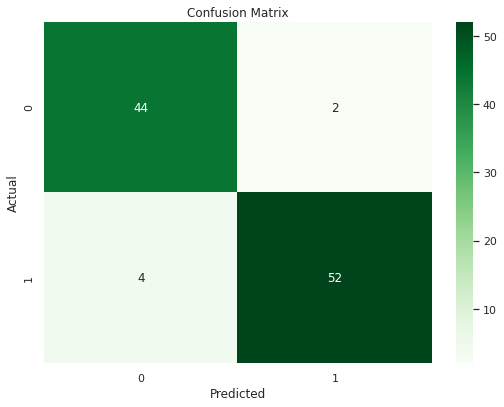

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        46
           1       0.96      0.93      0.95        56

    accuracy                           0.94       102
   macro avg       0.94      0.94      0.94       102
weighted avg       0.94      0.94      0.94       102



In [76]:
evaluate_model(knn)

#### Decision Tree

In [77]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(train_features, train_targets)
test_predict = dtc.predict(test_features)

In [78]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [79]:
from sklearn.model_selection import RandomizedSearchCV

max_features = ['auto', 'sqrt']
# Maximum number of levels
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
np.random.seed(25)
random_states = np.random.choice(range(1,50), size = 10, replace=False)
ccp_alpha = [2**i for i in range(-10,0)]

random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state' : random_states,
               'ccp_alpha': ccp_alpha}

random_grid

{'ccp_alpha': [0.0009765625,
  0.001953125,
  0.00390625,
  0.0078125,
  0.015625,
  0.03125,
  0.0625,
  0.125,
  0.25,
  0.5],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'random_state': array([44, 15, 41, 34, 48,  8, 33, 20, 39, 36])}

In [80]:
# base model
dtc = tree.DecisionTreeClassifier()

dtc_random = RandomizedSearchCV(estimator = dtc, param_distributions = random_grid, 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1,
                               scoring = 'precision')

In [81]:
dtc_random.fit(train_features, train_targets)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [82]:
 dtc_random.best_params_


{'ccp_alpha': 0.0078125,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'random_state': 48}

In [83]:
 dtc_random.best_score_

0.9746376811594203

Model Accuracy:
Precision on training data: 1.000
Precision on testing data: 0.966
Accuracy on test data: 0.980


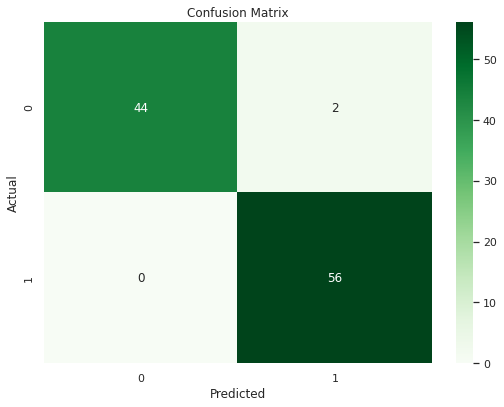

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        46
           1       0.97      1.00      0.98        56

    accuracy                           0.98       102
   macro avg       0.98      0.98      0.98       102
weighted avg       0.98      0.98      0.98       102



In [84]:
base_model_dtc = tree.DecisionTreeClassifier()
base_model_dtc.fit(train_features, train_targets)

evaluate_model(base_model_dtc)


Model Accuracy:
Precision on training data: 0.974
Precision on testing data: 0.949
Accuracy on test data: 0.971


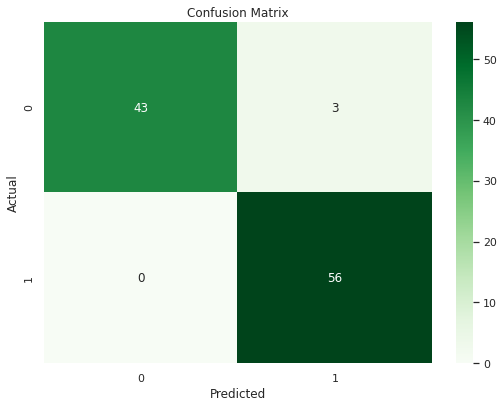

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        46
           1       0.95      1.00      0.97        56

    accuracy                           0.97       102
   macro avg       0.97      0.97      0.97       102
weighted avg       0.97      0.97      0.97       102



In [85]:
best_random_dtc = dtc_random.best_estimator_

evaluate_model(best_random_dtc)


#### Random Forest

In [86]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
# Maximum number of levels
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
ccp_alpha = [2**i for i in range(-10,0)]+[0]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'ccp_alpha': ccp_alpha}

random_grid

{'bootstrap': [True, False],
 'ccp_alpha': [0.0009765625,
  0.001953125,
  0.00390625,
  0.0078125,
  0.015625,
  0.03125,
  0.0625,
  0.125,
  0.25,
  0.5,
  0],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [87]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42,
                                    oob_score = True)

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1,
                               scoring = 'precision')

In [88]:
rfc_random.fit(train_features, train_targets)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 380 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [89]:
rfc_random.best_params_


{'bootstrap': True,
 'ccp_alpha': 0.0009765625,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}



```
{'bootstrap': True,
 'ccp_alpha': 0,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}
 ```



Model Accuracy:
Precision on training data: 1.000
Precision on testing data: 0.966
Accuracy on test data: 0.980


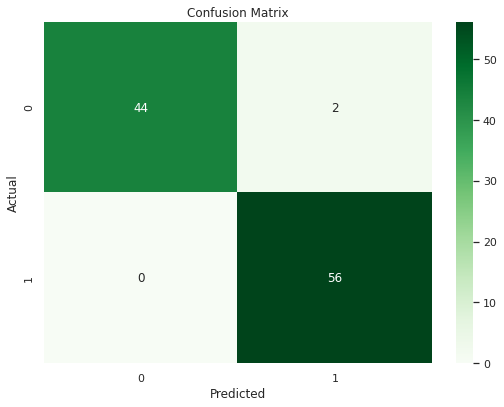

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        46
           1       0.97      1.00      0.98        56

    accuracy                           0.98       102
   macro avg       0.98      0.98      0.98       102
weighted avg       0.98      0.98      0.98       102



In [90]:
base_model = RandomForestClassifier(n_estimators = 100, random_state = 42,
                                    oob_score = True)
base_model.fit(train_features, train_targets)

evaluate_model(base_model)


In [91]:
rfc_random.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0009765625,
                       class_weight=None, criterion='gini', max_depth=50,
                       max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=42, verbose=0, warm_start=False)

Model Accuracy:
Precision on training data: 0.983
Precision on testing data: 0.966
Accuracy on test data: 0.980


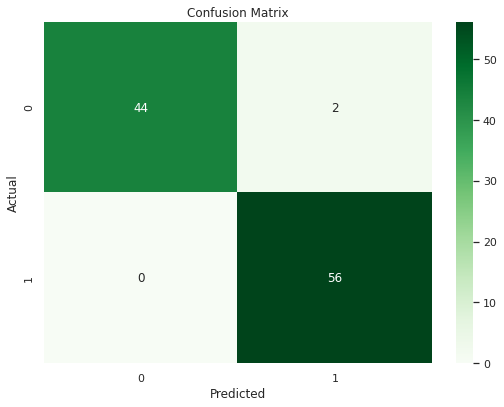

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        46
           1       0.97      1.00      0.98        56

    accuracy                           0.98       102
   macro avg       0.98      0.98      0.98       102
weighted avg       0.98      0.98      0.98       102



In [92]:
best_random = rfc_random.best_estimator_

evaluate_model(best_random)


### Prediction for the new stars

In [93]:
# descriptive stats
all_stars_filtered.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_6913_center
count,2.398700e+04,2.398700e+04,2.398700e+04,23987.0,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.0,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,23987.000000,...,2.375700e+04,23757.000000,23757.000000,23757.000000,23757.000000,23987.000000,23757.000000,23758.000000,23757.000000,1255.000000,1255.000000,23987.000000,1255.000000,1255.000000,1255.000000,23987.000000,23987.000000,23987.000000,23987.000000,12653.000000,12653.000000,12653.000000,12653.000000,7102.000000,7102.000000,7102.000000,7102.000000,7102.000000,7102.000000,10122.0,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,23987.000000,23987.000000,23987.000000,23987.000000
mean,1.635721e+18,2.061132e+18,8.446398e+08,2015.5,305.869185,0.057080,38.539277,0.070902,0.781669,0.078070,15.799493,-1.817273,0.127968,-4.731271,0.142106,-0.036871,0.026184,-0.143248,-0.058873,0.179412,-0.093278,-0.292032,-0.135667,-0.010500,-0.028635,252.950348,9.168091,251.644391,1.305957,2.732363,355.881317,0.161679,3.416984,31.0,17.062563,1.397104,0.017575,0.043465,28.860174,15.834786,...,3.621318e+04,122.451847,385.056671,15.549180,1.400860,0.107141,2.036057,1.026578,1.009445,-16.596781,3.214843,0.386293,5216.732910,3.415538,-0.120717,76.878401,0.687592,323.941134,55.462744,100044.647119,4283.923340,4085.736816,4632.446777,1.845879,1.620337,2.112963,0.927564,0.809835,1.066376,200111.0,3.064407,2.621163,3.369684,7.582558,6.732452,8.432628,0.546985,44.894570,62.606048,0.546929
std,0.000000e+00,2.146427e+15,4.883981e+08,0.0,0.526285,0.030608,0.394108,0.037888,0.666373,0.041540,22.199034,5.693963,0.069087,6.300675,0.075554,0.091774,0.134952,0.097382,0.070207,0.127298,0.074193,0.138831,0.092862,0.109535,0.095018,23.837485,46.673295,23.796858,1.840618,6.856148,483.168854,0.203937,15.438901,0.0,53.138466,0.085737,0.009509,0.048344,2.642764,1.050669,...,5.317574e+05,6609.206819,338.960541,1.491789,0.119335,0.334553,0.597721,0.412849,0.202580,23.957048,3.637185,1.764821,691.744324,0.547247,0.408210,0.380328,0.424444,0.693565,0.412384,291.766592,654.641724,670.748352,632.920166,0.972481,0.964608,0.980292,0.492585,0.486252,0.500655,0.0,4.268611,3.705291,4.669806,61.406105,55.528259,67.320969,0.183856,85.995177,95.152635,0.183825
min,1.635721e+18,2.057998e+18,3.098050e+05,2015.5,304.961939,0.009945,37.725113,0.011774,0.134849,0.013523,3.0

In [94]:
# chosing only GAIA stars close to 0.40 degree radius of the center
all_stars_filtered = all_stars_filtered.dropna(subset = feature_columns)
GAIA_target_stars = all_stars_filtered[all_stars_filtered['dist_6913_center'] <= (cantat_radius*2)]

In [95]:
# removing the member stars from GAIA data
GAIA_target_stars = pd.concat([GAIA_target_stars, training_data.drop(columns=['PMemb', 'member']), 
                               training_data.drop(columns=['PMemb', 'member'])]).drop_duplicates(keep=False)

In [96]:
# select the set of predictor variables from the new dataset
new_features = GAIA_target_stars.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [97]:
# train the model again using all the features and targets of the previous dataset
# rfc.fit(features, targets)

In [98]:
# estimate the membership classification of the stars
GAIA_target_stars['member'] = best_random.predict(new_features)
GAIA_target_stars['member'].value_counts()

0    12350
1      508
Name: member, dtype: int64

In [99]:
# estimate the membership probability of the stars
GAIA_target_stars['PMemb'] = best_random.predict_proba(new_features)[:,1]
sum(GAIA_target_stars['PMemb'] > 0.5)

508

In [100]:
potentialMember = GAIA_target_stars[GAIA_target_stars['member'] == 1]
len(potentialMember)

508

In [101]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_6913_center,member,PMemb
count,5.080000e+02,5.080000e+02,5.080000e+02,508.0,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.0,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,...,505.000000,505.000000,505.000000,508.000000,505.000000,505.000000,505.000000,2.000000,2.000000,508.000000,2.000000,2.00000,2.0,508.000000,508.000000,508.000000,508.000000,383.000000,383.000000,383.000000,383.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,375.0,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,508.000000,508.000000,508.000000,508.000000,508.0,508.000000
mean,1.635721e+18,2.061100e+18,8.409610e+08,2015.5,305.704566,0.039972,38.571658,0.048275,0.551399,0.054072,15.766469,-3.322731,0.088738,-5.804409,0.098314,-0.034691,0.033255,-0.153931,-0.053190,0.184928,-0.083557,-0.270171,-0.130096,-0.013303,-0.027734,256.523622,20.714567,255.202756,1.320866,0.431325,267.866089,0.080492,0.787163,31.0,43.954094,1.438451,0.012198,0.043900,29.269685,16.037402,...,563.008606,14.719009,1.352752,0.147638,1.762981,0.854574,0.908407,36.612258,2.758642,0.033465,5250.000000,3.75000,0.0,76.830528,0.811423,323.757617,55.545647,100016.835509,4466.643066,4290.380371,4790.107910,2.243777,1.943880,2.692676,1.129824,0.970826,1.363433,200111.0,4.020505,3.561222,4.322978,19.507202,17.598047,21.416351,0.446457,58.614997,94.974972,0.446367,1.0,0.882708
std,0.000000e+00,1.313341e+15,5.008821e+08,0.0,0.333394,0.029052,0.305466,0.035166,0.039226,0.039192,9.193490,0.194067,0.065013,0.253917,0.072782,0.083292,0.137855,0.092124,0.063801,0.121684,0.068652,0.131701,0.098229,0.094672,0.088592,24.769657,68.585765,24.681247,1.754509,3.639364,99.164703,0.146220,2.505054,0.0,86.195770,0.090997,0.008932,0.046820,2.737732,0.973302,...,398.238770,1.682656,0.102981,0.371380,0.563099,0.358156,0.213285,67.984316,3.008621,0.576378,353.553406,1.06066,0.0,0.287422,0.280454,0.468410,0.301653,176.528646,597.306213,594.730225,563.627014,0.611843,0.624268,0.472515,0.312413,0.315542,0.233595,0.0,4.572324,4.358634,4.785298,120.732971,108.668785,132.803558,0.107390,34.877389,57.827370,0.107319,0.0,0.136664
min,1.635721e+18,2.058091e+18,2.601496e+06,2015.5,305.227174,0.010781,37.922678,0.011774,0.458787,0.014355,3.104956,-3.753014,0.022819,-6.406151,0.021726,-0.286891,-0.338699,-0.455532,-0.291288,-0.262658,-0.293386,-0.695057,-0.369477,-0.325717,-0.388057,151.000000,0.000000,147.000000,0.000000,-8.593496,95.898674,0.000000,0.000000,31.0

In [102]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_6913_center,member
count,1.700000e+02,1.700000e+02,1.700000e+02,170.0,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.0,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,169.000000,169.000000,169.000000,170.000000,169.000000,169.000000,169.000000,1.000000,1.000000,170.000000,1.0,1.0,1.0,170.000000,170.000000,170.000000,170.000000,145.000000,145.000000,145.000000,145.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,144.0,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.0
mean,1.635721e+18,2.061104e+18,8.991247e+08,2015.5,305.916874,0.030140,38.498505,0.036322,0.549987,0.041139,18.595560,-3.380745,0.067076,-5.764726,0.074174,-0.052862,0.047154,-0.138174,-0.051963,0.178949,-0.087508,-0.279096,-0.162469,-0.028793,-0.032876,261.029412,31.388235,259.623529,1.405882,-0.452034,251.052277,0.048083,0.398448,31.0,57.397316,1.461027,0.009230,0.062775,29.729412,16.105882,...,690.067383,14.236567,1.320751,0.176471,1.606532,0.757240,0.849291,-17.989237,5.377616,0.035294,5000.0,3.0,0.0,76.865400,0.633193,323.971153,55.411141,100001.193103,4521.335938,4340.726562,4858.288574,2.151746,1.871649,2.629261,1.076579,0.928603,1.343582,200111.0,4.154220,3.680255,4.482897,15.790257,14.470527,17.109993,0.155467,71.419562,110.971035,0.561765,0.155479,1.0
std,0.000000e+00,3.270528e+14,4.883002e+08,0.0,0.142852,0.021423,0.125399,0.026414,0.031147,0.028844,8.643813,0.162431,0.048570,0.184031,0.055731,0.074475,0.128318,0.103372,0.062765,0.135922,0.061610,0.135682,0.085144,0.094080,0.076245,22.651574,86.893881,22.167718,2.222790,3.340387,79.192787,0.099826,1.263057,0.0,97.824677,0.079588,0.006703,0.040093,2.543762,0.979355,...,393.197235,1.571638,0.072689,0.397521,0.452540,0.271826,0.183238,NaN,NaN,0.460179,NaN,NaN,NaN,0.113765,0.123647,0.190410,0.128638,0.396102,556.623779,550.933777,521.955872,0.770660,0.725869,0.540000,0.391130,0.365506,0.281625,0.0,3.504805,3.357561,3.662597,61.949299,57.375221,66.523674,0.085152,33.970233,51.393213,0.257680,0.085171,0.0
min,1.635721e+18,2.058110e+18,1.723005e+06,2015.5,305.636921,0.011508,38.261299,0.013074,0.479977,0.015596,3.813220,-3.740193,0.025444,-6.255921,0.027417,-0.256366,-0.394684,-0.369383,-0.213974,-0.214332,-0.228630,-0.749702,-0.336544,-0.197922,-0.274328,197.000000,0.000000,196.000000,0.000000,-8.638947,106.939201,0.000000,0.000000,31.0,0.857305,1.293266,0.003151,-0.037380,22.000000

#### Visualization

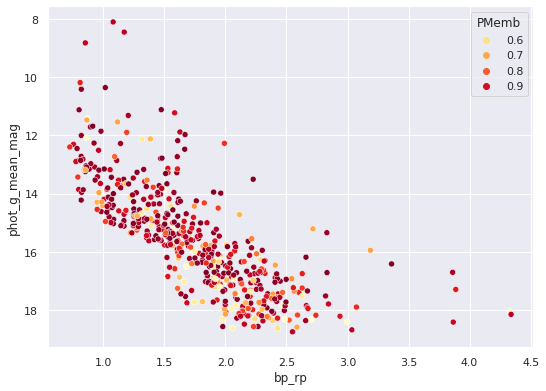

In [103]:
# CMD of predicted members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
cmd.invert_yaxis()

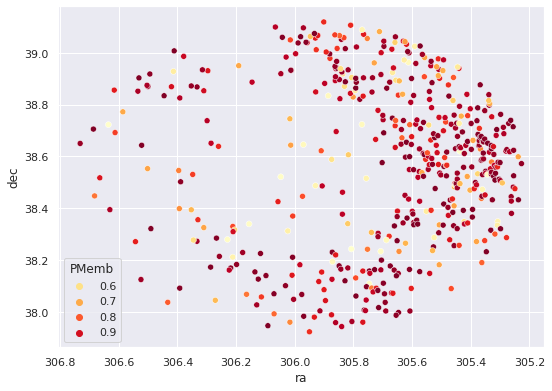

In [104]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

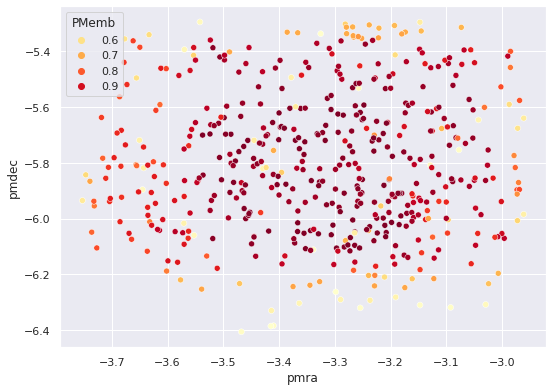

In [105]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )


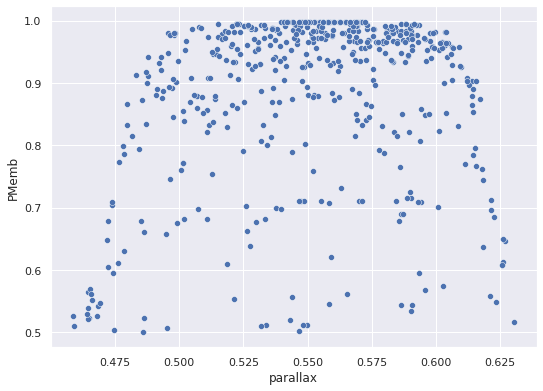

In [106]:
# parallax plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )

In [107]:
# saving the files as csv
# all_stars.to_csv('gaia_6913_membership_prob.csv')

potentialMember.to_csv('NGC_6913_membership_prob.csv')


### Comparing the old and new predicted members

In [108]:
# creating subset for the potential member in previous dataset

concatenated = pd.concat([potentialMember.assign(dataset='New_member'), member.assign(dataset='Old_member')])


In [109]:
concatenated.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_6913_center,member,PMemb
count,6.780000e+02,6.780000e+02,6.780000e+02,678.0,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.0,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,...,674.000000,674.000000,674.000000,678.000000,674.000000,674.000000,674.000000,3.000000,3.000000,678.000000,3.000000,3.000000,3.0,678.000000,678.000000,678.000000,678.000000,528.000000,528.000000,528.000000,528.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,519.0,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,678.000000,678.000000,678.000000,678.000000,678.0,678.000000
mean,1.635721e+18,2.061101e+18,8.555448e+08,2015.5,305.757800,0.037506,38.553315,0.045278,0.551045,0.050829,16.475834,-3.337278,0.083306,-5.794459,0.092261,-0.039247,0.036740,-0.149980,-0.052882,0.183429,-0.084548,-0.272409,-0.138213,-0.017187,-0.029024,257.653392,23.390855,256.311209,1.342183,0.209833,263.650177,0.072366,0.689698,31.0,47.324806,1.444111,0.011454,0.048633,29.384956,16.054572,...,594.867371,14.598038,1.344728,0.154867,1.723753,0.830169,0.893584,18.411760,3.631634,0.033923,5166.666504,3.500000,0.0,76.839271,0.766734,323.811158,55.511921,100012.539773,4481.663086,4304.205566,4808.833008,2.222155,1.926911,2.677777,1.117315,0.960906,1.358769,200111.0,4.057604,3.594248,4.367348,18.475920,16.730303,20.221521,0.373495,61.825581,98.985784,0.373431,1.0,0.802236
std,0.000000e+00,1.148234e+15,4.980381e+08,0.0,0.311152,0.027656,0.273516,0.033574,0.037348,0.037275,9.135299,0.188214,0.061988,0.238819,0.069657,0.081500,0.135568,0.095236,0.063499,0.125329,0.066933,0.132666,0.096088,0.094693,0.085638,24.318223,73.682274,24.135980,1.881502,3.584871,94.779099,0.136736,2.264108,0.0,89.369652,0.088760,0.008522,0.045934,2.695948,0.974551,...,400.499603,1.667551,0.097230,0.378013,0.541465,0.341015,0.207620,57.486590,2.610027,0.549230,288.675140,0.866025,0.0,0.255590,0.262101,0.426548,0.275100,150.456492,586.402161,582.948120,552.846802,0.651292,0.647985,0.488243,0.332080,0.327296,0.244962,0.0,4.299889,4.102612,4.499079,107.640709,97.143539,118.149445,0.162413,35.069822,56.672575,0.162346,0.0,0.223478
min,1.635721e+18,2.058091e+18,1.723005e+06,2015.5,305.227174,0.010781,37.922678,0.011774,0.458787,0.014355,3.104956,-3.753014,0.022819,-6.406151,0.021726,-0.286891,-0.394684,-0.455532,-0.291288,-0.262658,-0.293386,-0.749702,-0.369477,-0.325717,-0.388057,151.000000,0.000000,147.000000,0.000000,-8.638947,95.898674,0.000000,0.000000,31

In [110]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_6913_center,member
count,1.700000e+02,1.700000e+02,1.700000e+02,170.0,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.0,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,169.000000,169.000000,169.000000,170.000000,169.000000,169.000000,169.000000,1.000000,1.000000,170.000000,1.0,1.0,1.0,170.000000,170.000000,170.000000,170.000000,145.000000,145.000000,145.000000,145.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,144.0,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.0
mean,1.635721e+18,2.061104e+18,8.991247e+08,2015.5,305.916874,0.030140,38.498505,0.036322,0.549987,0.041139,18.595560,-3.380745,0.067076,-5.764726,0.074174,-0.052862,0.047154,-0.138174,-0.051963,0.178949,-0.087508,-0.279096,-0.162469,-0.028793,-0.032876,261.029412,31.388235,259.623529,1.405882,-0.452034,251.052277,0.048083,0.398448,31.0,57.397316,1.461027,0.009230,0.062775,29.729412,16.105882,...,690.067383,14.236567,1.320751,0.176471,1.606532,0.757240,0.849291,-17.989237,5.377616,0.035294,5000.0,3.0,0.0,76.865400,0.633193,323.971153,55.411141,100001.193103,4521.335938,4340.726562,4858.288574,2.151746,1.871649,2.629261,1.076579,0.928603,1.343582,200111.0,4.154220,3.680255,4.482897,15.790257,14.470527,17.109993,0.155467,71.419562,110.971035,0.561765,0.155479,1.0
std,0.000000e+00,3.270528e+14,4.883002e+08,0.0,0.142852,0.021423,0.125399,0.026414,0.031147,0.028844,8.643813,0.162431,0.048570,0.184031,0.055731,0.074475,0.128318,0.103372,0.062765,0.135922,0.061610,0.135682,0.085144,0.094080,0.076245,22.651574,86.893881,22.167718,2.222790,3.340387,79.192787,0.099826,1.263057,0.0,97.824677,0.079588,0.006703,0.040093,2.543762,0.979355,...,393.197235,1.571638,0.072689,0.397521,0.452540,0.271826,0.183238,NaN,NaN,0.460179,NaN,NaN,NaN,0.113765,0.123647,0.190410,0.128638,0.396102,556.623779,550.933777,521.955872,0.770660,0.725869,0.540000,0.391130,0.365506,0.281625,0.0,3.504805,3.357561,3.662597,61.949299,57.375221,66.523674,0.085152,33.970233,51.393213,0.257680,0.085171,0.0
min,1.635721e+18,2.058110e+18,1.723005e+06,2015.5,305.636921,0.011508,38.261299,0.013074,0.479977,0.015596,3.813220,-3.740193,0.025444,-6.255921,0.027417,-0.256366,-0.394684,-0.369383,-0.213974,-0.214332,-0.228630,-0.749702,-0.336544,-0.197922,-0.274328,197.000000,0.000000,196.000000,0.000000,-8.638947,106.939201,0.000000,0.000000,31.0,0.857305,1.293266,0.003151,-0.037380,22.000000

In [111]:
concatenated.dataset.value_counts()

New_member    508
Old_member    170
Name: dataset, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

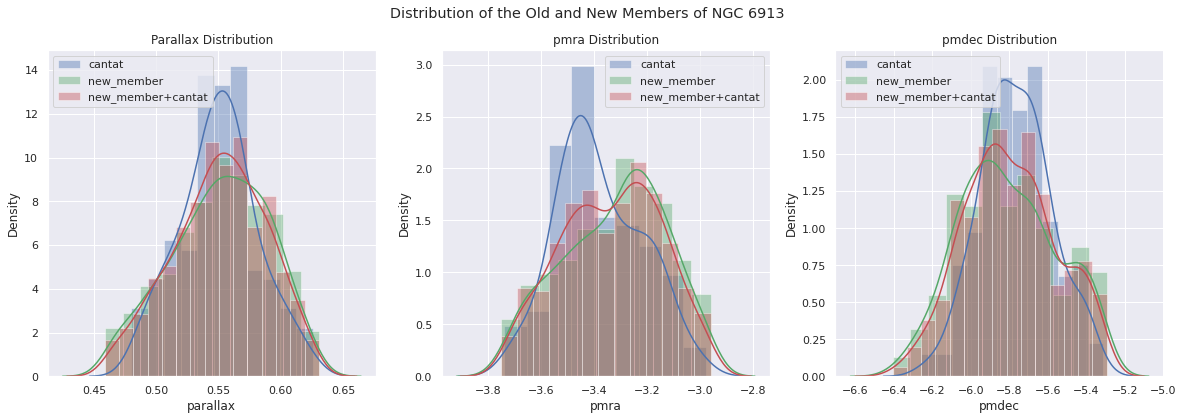

In [112]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Distribution of the Old and New Members of NGC 6913')


sns.distplot(member['parallax'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[0])
sns.distplot(potentialMember['parallax'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[0])
sns.distplot(concatenated['parallax'], color = 'r', ax=axes[0], kde=True,
             label = 'new_member+cantat')
axes[0].set_title('Parallax Distribution')
axes[0].legend()

sns.distplot(member['pmra'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[1])
sns.distplot(potentialMember['pmra'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[1])
sns.distplot(concatenated['pmra'], color = 'r', ax=axes[1], kde=True,
             label = 'new_member+cantat')
axes[1].set_title('pmra Distribution')
axes[1].legend()

sns.distplot(member['pmdec'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[2])
sns.distplot(potentialMember['pmdec'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[2])
sns.distplot(concatenated['pmdec'], color = 'r', ax=axes[2], kde=True,
             label = 'new_member+cantat')
axes[2].set_title('pmdec Distribution')
axes[2].legend()

plt.show()


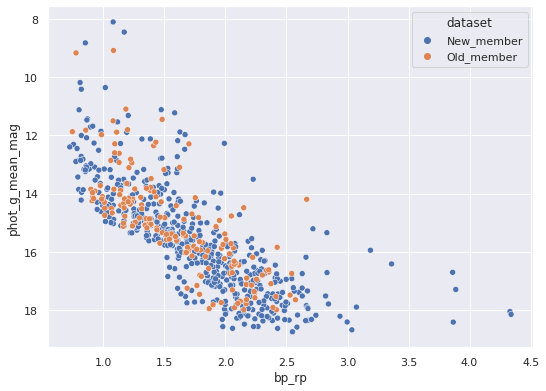

In [113]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

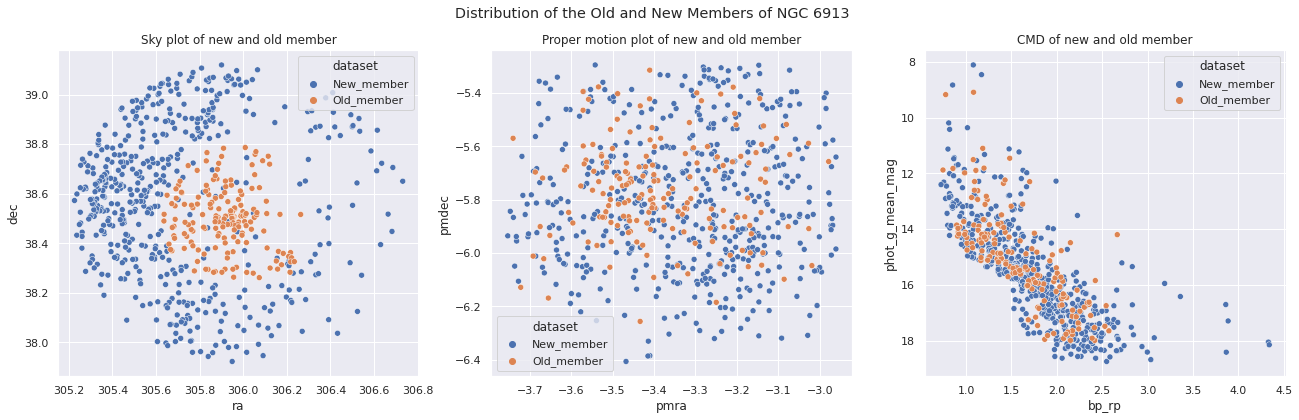

In [114]:
fig, axes = plt.subplots(1, 3, figsize=(22,6))
fig.suptitle('Distribution of the Old and New Members of NGC 6913')

skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                hue='dataset', ax=axes[0])
axes[0].set_title('Sky plot of new and old member')

# proper motion plot
sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                hue='dataset', ax=axes[1])
axes[1].set_title('Proper motion plot of new and old member')

# CMD
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset', ax = axes[2])
cmd.invert_yaxis()
axes[2].set_title('CMD of new and old member')

plt.show()

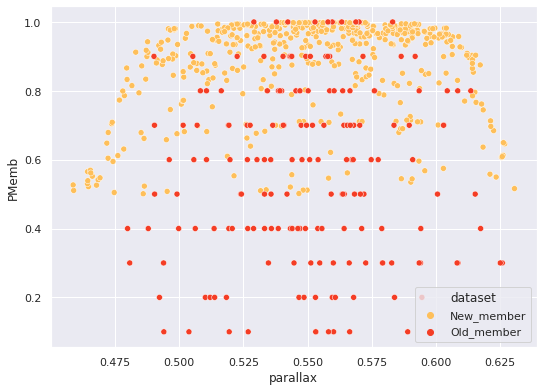

In [115]:
# parallax vs PMemb plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  hue = 'dataset',
                      palette='YlOrRd', data = concatenated )

In [116]:
# pd_prof.ProfileReport(potentialMember)

In [117]:
#files.download('NGC_6913_cantat.csv')

#files.download('NGC_6913_membership_prob.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


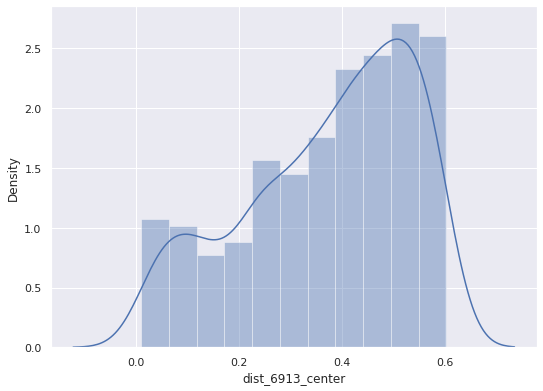

In [118]:
sns.distplot(concatenated['dist_6913_center'])

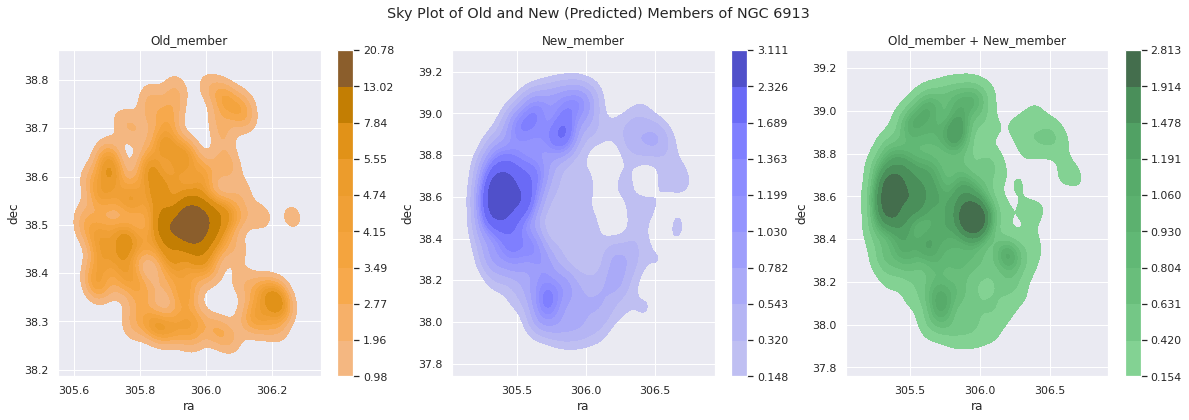

In [119]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Sky Plot of Old and New (Predicted) Members of NGC 6913')

sns.kdeplot(x='ra', y='dec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='ra', y='dec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='ra', y='dec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

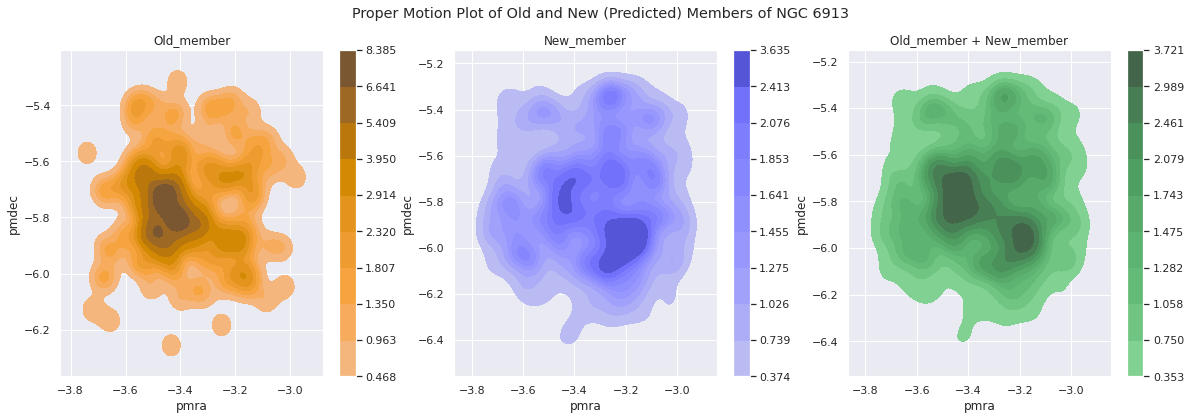

In [120]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Proper Motion Plot of Old and New (Predicted) Members of NGC 6913')

sns.kdeplot(x='pmra', y='pmdec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='pmra', y='pmdec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='pmra', y='pmdec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

In [121]:
#files.download('NGC_6913_cantat.csv')

potentialMember.to_csv('NGC_6913_additional_member_prob.csv')
concatenated.to_csv('NGC_6913_all_member_prob.csv')

files.download('NGC_6913_all_member_prob.csv')
# column 'dataset': Old_member, New_member
# column 'member': 0 and 1
# column 'PMemb': decimal values between 0 to 1

files.download('NGC_6913_additional_member_prob.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>